In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense, LSTM
import time
from datetime import datetime
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import sklearn.metrics
import math
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
## YOUR CODE HERE
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<p> The csv files were available individually. The following commented block of code was to concatenate that data into a single dataframe which was then saved subsequently. </p>

In [ ]:
# import glob
# path = '/content/gdrive/My Drive/Adv Big Data and AI/csv/*.csv'
# df = pd.DataFrame()
# for fname in glob.glob(path):
#    df2=pd.read_csv(fname)
#    fname = fname.replace('/content/gdrive/My Drive/Adv Big Data and AI/csv/','')
#    df2['Stock'] = fname[:-4]
#    df = df.append(df2, ignore_index = True)

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Adv Big Data and AI/file1.csv')

In [ ]:

cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df.head()

,Stock,Date,Low,Open,Volume,High,Close,Adjusted Close
0,A,18-11-1999,28.612303,32.546494,62546380.0,35.765381,31.473534,26.929760
1,A,19-11-1999,28.478184,30.713518,15234146.0,30.758226,28.880545,24.711119
2,A,22-11-1999,28.657009,29.551144,6577870.0,31.473534,31.473534,26.929760
3,A,23-11-1999,28.612303,30.400572,5975611.0,31.205294,28.612303,24.481602
4,A,24-11-1999,28.612303,28.701717,4843231.0,29.998213,29.372318,25.131901


In [ ]:
# np.unique(df['Stock'].values)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True )

<p> Visualization: Function to plot data for any given stock in a given time period </p>

In [ ]:
def plot(start,end,stock):
  df_plot = df[(df["Date"] >= start) & (df["Date"] <= end) & (df["Stock"]==stock)]
  plt.plot(df_plot['Date'], df_plot['Close'])
  plt.xlabel('Date')
  plt.ylabel('Close')
  plt.title('Stock Price Over Time')
  plt.show()

  info = {}
  info['start_date'] = df_plot['Date'].iloc[0]
  info['end_date'] = df_plot['Date'].iloc[-1]
  info['Start val'] = df_plot[df_plot['Stock']==stock]['Open'].iloc[0]
  info['End val'] = df_plot[df_plot['Stock']==stock]['Close'].iloc[-1]
  info['return'] = '{}%'.format(((info['End val'] - info['Start val'])*100)/info['Start val'])
  print(info)

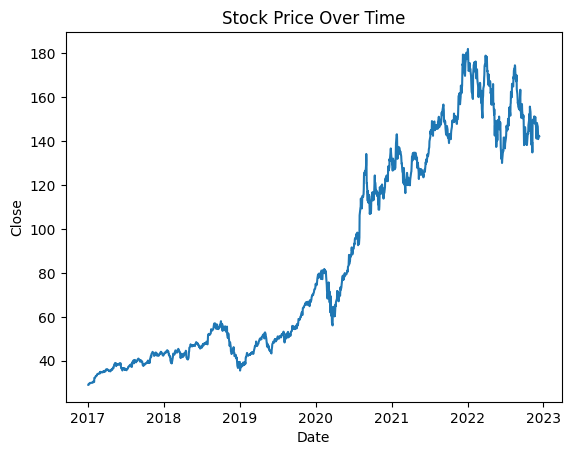

{'start_date': Timestamp('2017-01-03 00:00:00'), 'end_date': Timestamp('2022-12-12 00:00:00'), 'Start val': 28.950000762939453, 'End val': 142.24000549316406, 'return': '391.32988512820214%'}


In [ ]:
start ="2017/01/01"
end ="2023/05/01"
stock = 'AAPL'
details = plot(start,end,stock)

<p> Functions for data exploration to see trends in stocks </p>

In [ ]:
# def calculate_average(df,ma_days):
#     for ma in ma_days:
#         column_name = "MA for %s days" %(str(ma))
#         df.loc[:,column_name]=pd.DataFrame.rolling(df['Close'],ma).mean()

In [ ]:
# def calculate_maximum(df,ma_days):
#     for ma in ma_days:
#         column_name = "Maximum for %s days" %(str(ma))
#         df.loc[:,column_name]=pd.DataFrame.rolling(df['Close'],ma).max()

In [ ]:
# def calculate_minimum(df,ma_days):
#     for ma in ma_days:
#         column_name = "Minimum for %s days" %(str(ma))
#         df.loc[:,column_name]=pd.DataFrame.rolling(df['Close'],ma).min()

In [ ]:
# ma_days=[7,30,90,365]
# calculate_average(df,ma_days)
# calculate_maximum(df,ma_days)
# calculate_minimum(df,ma_days)
df.loc[:,'Daily Return'] = df['Close'].pct_change()*100

df.columns

Index(['Stock', 'Date', 'Low', 'Open', 'Volume', 'High', 'Close',
       'Adjusted Close', 'Daily Return'],
      dtype='object')

In [ ]:
start_date=pd.to_datetime("01/01/2012",dayfirst=True)
end_date=pd.to_datetime("01/01/2022",dayfirst=True)
df_t = df[(df["Date"] >= end_date)]
df = df[(df["Date"] >= start_date) & (df["Date"] <= end_date)]

In [ ]:
df = df.dropna()
df = df.reset_index(drop=True)

In [ ]:
df

,Stock,Date,Low,Open,Volume,High,Close,Adjusted Close,Daily Return
0,A,2012-01-03,25.565092,25.636623,4156394.0,26.459227,26.094421,23.696428,4.437445
1,A,2012-01-04,25.457796,25.858370,4651845.0,26.008583,25.886980,23.508047,-0.794964
2,A,2012-01-05,25.550787,25.665236,6842651.0,26.695278,26.466381,24.034206,2.238195
3,A,2012-01-06,26.330473,26.530758,4711400.0,26.866953,26.752504,24.294035,1.081082
4,A,2012-01-09,26.802574,26.909870,4429563.0,27.482117,27.453505,24.930614,2.620316
...,...,...,...,...,...,...,...,...,...
998716,ZTS,2021-12-27,243.080002,244.389999,807000.0,246.720001,246.509995,244.714554,1.649417
998717,ZTS,2021-12-28,243.639999,247.000000,1004400.0,247.839996,244.250000,242.471024,-0.916796
998718,ZTS,2021-12-29,243.639999,244.020004,939900.0,247.850006,247.029999,245.230759,1.138178
998719,ZTS,2021-12-30,244.960007,247.050003,859100.0,249.270004,245.160004,243.374405,-0.756991


<p> Finding returns of stocks (2012-2021) and storing it in a dictionary </p>

In [ ]:
arr = df.Stock.unique()
return_inv = {}
for i in range(len(arr)):
  stock = arr[i]
  old = df[df['Stock']==stock]['Close'].iloc[0]
  new = df[df['Stock']==stock]['Close'].iloc[-1]
  return_inv[stock] = (new-old)/old*100

In [ ]:
# max_5 = sorted(return_inv, key=return_inv.get, reverse=True)[:5]
max_5 = sorted(return_inv.items(), key=lambda x:x[1],reverse=True)[:5]
max_5

[('DXCM', 3267.942083807932),
 ('ABMD', 2678.305462101894),
 ('AMD', 2642.4902340262142),
 ('NFLX', 2272.5138239497783),
 ('MSCI', 1439.6825264906556)]

#### Modeling

In [ ]:
df

,Stock,Date,Low,Open,Volume,High,Close,Adjusted Close,Daily Return
0,A,2012-01-03,25.565092,25.636623,4156394.0,26.459227,26.094421,23.696428,4.437445
1,A,2012-01-04,25.457796,25.858370,4651845.0,26.008583,25.886980,23.508047,-0.794964
2,A,2012-01-05,25.550787,25.665236,6842651.0,26.695278,26.466381,24.034206,2.238195
3,A,2012-01-06,26.330473,26.530758,4711400.0,26.866953,26.752504,24.294035,1.081082
4,A,2012-01-09,26.802574,26.909870,4429563.0,27.482117,27.453505,24.930614,2.620316
...,...,...,...,...,...,...,...,...,...
998716,ZTS,2021-12-27,243.080002,244.389999,807000.0,246.720001,246.509995,244.714554,1.649417
998717,ZTS,2021-12-28,243.639999,247.000000,1004400.0,247.839996,244.250000,242.471024,-0.916796
998718,ZTS,2021-12-29,243.639999,244.020004,939900.0,247.850006,247.029999,245.230759,1.138178
998719,ZTS,2021-12-30,244.960007,247.050003,859100.0,249.270004,245.160004,243.374405,-0.756991


In [ ]:
# Extract the year, month, and day as separate columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Drop the original 'Date' column
df2 = df.drop(columns=['Date','Daily Return'])

In [ ]:
st_opt = sorted(return_inv, key = return_inv.get,reverse=True)


<p>Choosing a fifth of the total stocks of varying returns, to train our model. GPU limitations but at the same time prevents a bit of overfitting as doesn't get to learn data of a lot of stocks. </p>

In [ ]:
i=0
st_new = []
while(i<len(st_opt)):
  st_new.append(st_opt[i])
  i+=5


In [ ]:
st_new= st_new[0:80]

In [ ]:
df_new = pd.DataFrame()
for i in range(len(st_new)):
  df_new = df_new.append(df2[df2['Stock']==st_new[i]], ignore_index=True)

<ipython-input-22-3195fae59ea3>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
df_new

,Stock,Low,Open,Volume,High,Close,Adjusted Close,Year,Month,Day
0,NFLX,10.018571,10.040000,29213800.0,10.388571,10.320000,10.320000,2012,1,3
1,NFLX,10.258571,10.335714,100489900.0,11.567143,11.492857,11.492857,2012,1,4
2,NFLX,11.040000,11.345714,86552900.0,11.694286,11.328571,11.328571,2012,1,5
3,NFLX,11.242857,11.302857,125610800.0,12.471429,12.327143,12.327143,2012,1,6
4,NFLX,12.448571,12.801429,214073300.0,14.235714,14.025714,14.025714,2012,1,9
...,...,...,...,...,...,...,...,...,...,...
197588,APA,25.510000,25.940001,8832300.0,28.010000,27.969999,27.519089,2021,12,27
197589,APA,27.730000,28.280001,6778600.0,28.629999,27.930000,27.479738,2021,12,28
197590,APA,27.600000,27.889999,7091300.0,28.510000,27.910000,27.460058,2021,12,29
197591,APA,27.010000,27.910000,5387900.0,28.200001,27.059999,26.623760,2021,12,30


In [ ]:
# df_new['Num'] = pd.factorize(df_new['Stock'])[0] + 1

In [ ]:
df_new = df_new.drop(columns=['Stock'])


In [ ]:
df_new.head()

,Low,Open,Volume,High,Close,Adjusted Close,Year,Month,Day
0,10.018571,10.040000,29213800.0,10.388571,10.320000,10.320000,2012,1,3
1,10.258571,10.335714,100489900.0,11.567143,11.492857,11.492857,2012,1,4
2,11.040000,11.345714,86552900.0,11.694286,11.328571,11.328571,2012,1,5
3,11.242857,11.302857,125610800.0,12.471429,12.327143,12.327143,2012,1,6
4,12.448571,12.801429,214073300.0,14.235714,14.025714,14.025714,2012,1,9


#####LSTM

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df_new)

# Split the data into training and testing sets
train_size = int(len(df_scaled) * 0.8)
test_size = len(df_scaled) - train_size
train, test = df_scaled[0:train_size,:], df_scaled[train_size:len(df_scaled),:]

# Convert the data into a 3D array (a sequence with t timesteps and d dimensions)
def create_sequences(data, t, d):
    X, y = [], []
    for i in range(len(data)-t-1):
        a = data[i:(i+t), :]
        X.append(a)
        y.append(data[i + t, :])
    return np.array(X), np.array(y)

# Create sequences of t timesteps with d dimensions
t = 10 # timesteps
d = 9 # dimensions (including year, month, and day)
X_train, y_train = create_sequences(train, t, d)
X_test, y_test = create_sequences(test, t, d)

In [ ]:
# Build the model
model = Sequential()
model.add(LSTM(5, input_shape=(t, d)))
model.add(Dense(d))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train,
                    y_train,
                    epochs=5,
                    batch_size=1,
                    verbose=1
                   )

Epoch 1/5
158063/158063 [==============================] - 558s 4ms/step - loss: 0.0039
Epoch 2/5
158063/158063 [==============================] - 553s 4ms/step - loss: 0.0027
Epoch 3/5
158063/158063 [==============================] - 553s 3ms/step - loss: 0.0026
Epoch 4/5
158063/158063 [==============================] - 551s 3ms/step - loss: 0.0025
Epoch 5/5
158063/158063 [==============================] - 549s 3ms/step - loss: 0.0024


In [ ]:
prediction = model.predict(X_test)
mse = sklearn.metrics.mean_squared_error(y_test,prediction)
rmse = math.sqrt(mse)
MBE = np.mean(prediction - y_test)

1235/1235 [==============================] - 3s 2ms/step


<p> Saving our LSTM model. To be used in web app and subsequent testing </p>

In [ ]:
model.save('LSTM_80.h5')

In [ ]:
X_test.shape

(5023, 10, 9)

In [ ]:
y_test.shape

(5023, 9)

In [ ]:
# model.save('my_model.h5')

In [ ]:
# def mean_absolute_percentage_error(y_true, y_pred): 
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
prediction

array([[ 8.8633746e-03,  8.9764297e-03,  8.4105544e-03, ...,
        -2.3160785e-02,  1.0341793e-02,  5.1760858e-01],
       [ 9.1424659e-03,  9.3039647e-03,  8.8879243e-03, ...,
         6.9233775e-04, -1.2767464e-02,  5.9150225e-01],
       [ 8.3349794e-03,  8.5710660e-03,  8.6097969e-03, ...,
         1.0884404e-02, -3.9003134e-02,  6.5235209e-01],
       ...,
       [ 7.5517738e-01,  7.4879706e-01, -4.2335320e-02, ...,
         1.0485375e+00,  9.9309373e-01,  8.6933130e-01],
       [ 7.6741499e-01,  7.6092559e-01, -4.3930959e-02, ...,
         1.0644302e+00,  1.0108855e+00,  8.8782525e-01],
       [ 7.6830846e-01,  7.6198632e-01, -4.4026401e-02, ...,
         1.0493114e+00,  9.6489537e-01,  8.7441576e-01]], dtype=float32)

In [ ]:
print("Test set RMSE: ", rmse)
print("Test set MBE: ", MBE)


Test set RMSE:  0.05221442150414138
Test set MBE:  -0.0053286659846137


#####Regression Models

In [ ]:
y = df['Close']
df_new = df.drop(columns=['Close','Daily Return'])
df_new.head()

,Low,Open,Volume,High,Adjusted Close,MA for 7 days,MA for 30 days,MA for 90 days,MA for 365 days,Maximum for 7 days,...,Maximum for 90 days,Maximum for 365 days,Minimum for 7 days,Minimum for 30 days,Minimum for 90 days,Minimum for 365 days,Year,Month,Day,Num
0,25.565092,25.636623,4156394.0,26.459227,23.696428,25.141018,25.113019,25.015498,27.831227,26.094421,...,29.248926,37.610874,24.399141,23.555079,21.030043,19.291845,2012,3,1,1
1,25.457796,25.858370,4651845.0,26.008583,23.508047,25.278970,25.098236,25.040614,27.844063,26.094421,...,29.248926,37.610874,24.399141,23.555079,21.030043,19.291845,2012,4,1,1
2,25.550787,25.665236,6842651.0,26.695278,24.034206,25.446556,25.127086,25.057543,27.859996,26.466381,...,29.248926,37.610874,24.399141,23.555079,21.030043,19.291845,2012,5,1,1
3,26.330473,26.530758,4711400.0,26.866953,24.294035,25.666258,25.170482,25.062947,27.876889,26.752504,...,29.248926,37.610874,24.399141,23.555079,21.030043,19.291845,2012,6,1,1
4,26.802574,26.909870,4429563.0,27.482117,24.930614,26.102596,25.284454,25.076935,27.896937,27.453505,...,29.248926,37.610874,24.985695,23.555079,21.030043,19.291845,2012,9,1,1


In [ ]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(df_new, y, test_size=0.25, shuffle=False)

In [ ]:
# from sklearn.neural_network import MLPRegressor
# regression_model = LinearRegression()
# randomForestRegressor_model = RandomForestRegressor(max_depth=6, random_state=1)
# svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
# gradientReg = GradientBoostingRegressor(random_state=0)
# MLPRegressor=MLPRegressor(hidden_layer_sizes=(50, 50, 50), activation='relu',  solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=300, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

In [ ]:
# def train_test_and_measure(model_name,model,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):
#   model=model.fit(x_train,y_train)
#   prediction = model.predict(x_test)
#   mse = sklearn.metrics.mean_squared_error(y_test,prediction)
#   rmse = math.sqrt(mse)
#   MBE = np.mean(prediction - y_test)
#   print("Test set MAPE: {} ".format(model_name), mean_absolute_percentage_error(y_test,prediction))
#   print("Test set RMSE: {} ".format(model_name), rmse)
#   print("Test set MBE: {} ".format(model_name), MBE)
#   print("r^2: {} ".format(model.score(x_test,y_test)))

In [ ]:
# X_train.shape

(20125, 10, 22)

In [ ]:
df_new = df.drop(columns=['Daily Return'])


In [ ]:
df_new

,Stock,Date,Low,Open,Volume,High,Close,Adjusted Close,Year,Month,Day
0,A,2012-01-04,25.457796,25.858370,4651845.0,26.008583,25.886980,23.508047,2012,1,4
1,A,2012-01-05,25.550787,25.665236,6842651.0,26.695278,26.466381,24.034206,2012,1,5
2,A,2012-01-06,26.330473,26.530758,4711400.0,26.866953,26.752504,24.294035,2012,1,6
3,A,2012-01-09,26.802574,26.909870,4429563.0,27.482117,27.453505,24.930614,2012,1,9
4,A,2012-01-10,27.618027,27.768240,4459620.0,28.197426,27.968527,25.398304,2012,1,10
...,...,...,...,...,...,...,...,...,...,...,...
998715,ZTS,2021-12-27,243.080002,244.389999,807000.0,246.720001,246.509995,244.714554,2021,12,27
998716,ZTS,2021-12-28,243.639999,247.000000,1004400.0,247.839996,244.250000,242.471024,2021,12,28
998717,ZTS,2021-12-29,243.639999,244.020004,939900.0,247.850006,247.029999,245.230759,2021,12,29
998718,ZTS,2021-12-30,244.960007,247.050003,859100.0,249.270004,245.160004,243.374405,2021,12,30


In [ ]:
df_reg = pd.DataFrame()
for i in range(len(st_new)):
  df_reg = df_reg.append(df_new[df_new['Stock']==st_new[i]], ignore_index=True)

<ipython-input-127-824b1c2877ac>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
df_reg

,Stock,Date,Low,Open,Volume,High,Close,Adjusted Close,Year,Month,Day
0,NFLX,2012-01-03,10.018571,10.040000,29213800.0,10.388571,10.320000,10.320000,2012,1,3
1,NFLX,2012-01-04,10.258571,10.335714,100489900.0,11.567143,11.492857,11.492857,2012,1,4
2,NFLX,2012-01-05,11.040000,11.345714,86552900.0,11.694286,11.328571,11.328571,2012,1,5
3,NFLX,2012-01-06,11.242857,11.302857,125610800.0,12.471429,12.327143,12.327143,2012,1,6
4,NFLX,2012-01-09,12.448571,12.801429,214073300.0,14.235714,14.025714,14.025714,2012,1,9
...,...,...,...,...,...,...,...,...,...,...,...
197588,APA,2021-12-27,25.510000,25.940001,8832300.0,28.010000,27.969999,27.519089,2021,12,27
197589,APA,2021-12-28,27.730000,28.280001,6778600.0,28.629999,27.930000,27.479738,2021,12,28
197590,APA,2021-12-29,27.600000,27.889999,7091300.0,28.510000,27.910000,27.460058,2021,12,29
197591,APA,2021-12-30,27.010000,27.910000,5387900.0,28.200001,27.059999,26.623760,2021,12,30


In [ ]:
df_reg = df_reg.drop(columns=['Stock'])

In [ ]:
df_reg = df_reg.drop(columns=['Date'])

In [ ]:
df_reg = df_reg.drop(columns=['A'])

In [ ]:
test_length=len(df_reg)//5
end_point = len(df_reg)
x = end_point - test_length
finaldf_train = df_reg.loc[:x - 1, :]
finaldf_test = df_reg.loc[x:, :]
finaldf_test_x = finaldf_test.loc[:, finaldf_test.columns != 'Close']
finaldf_test_y = finaldf_test['Close']
finaldf_train_x = finaldf_train.loc[:, finaldf_train.columns != 'Close']
finaldf_train_y = finaldf_train['Close']

In [ ]:

regr = RandomForestRegressor(max_depth=10,random_state=0)
regr.fit(finaldf_train_x, finaldf_train_y)
prediction = regr.predict(finaldf_test_x)
mse = sklearn.metrics.mean_squared_error(finaldf_test_y,prediction)
rmse = math.sqrt(mse)
MBE = np.mean(prediction - finaldf_test_y)
# print("Test set MAPE: {} ".format('RF'), mean_absolute_percentage_error(finaldf_test_y,prediction))
print("Test set RMSE: {} ".format('RF'), rmse)
print("Test set MBE: {} ".format('RF'), MBE)
print("r^2: {} ".format(regr.score(finaldf_test_x,finaldf_test_y)))

Test set RMSE: RF  0.5304973638241534
Test set MBE: RF  0.009154691486672431
r^2: 0.9998339279082304 


In [ ]:
df[(df['Date'] == pd.to_datetime('2021-05-05')) & (df['Stock']=='NFLX')]

,Stock,Date,Low,Open,Volume,High,Close,Adjusted Close,Year,Month,Day,Daily Return
650702,NFLX,2021-05-05,494.630005,504.98999,3129400.0,507.779999,496.079987,496.079987,2021,5,5,-1.411027


In [ ]:
[[27.010000,27.910000,5387900.0,28.200001,26.623760,2021,12,30]]

In [ ]:
regr.predict(np.array([[27.010000,27.910000,5387900.0,28.200001,26.623760,2021,12,30]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



array([27.72457584])

In [ ]:
finaldf_test_x

,Low,Open,Volume,High,Adjusted Close,Year,Month,Day
158075,8.110000,8.110000,0.0,8.110000,7.957784,2020,4,24
158076,8.110000,8.110000,0.0,8.110000,7.957784,2020,4,27
158077,8.420000,8.420000,63600.0,8.420000,8.261966,2020,4,28
158078,8.500000,8.730000,800.0,8.730000,8.340465,2020,4,29
158079,8.730000,8.950000,400.0,8.950000,8.566147,2020,4,30
...,...,...,...,...,...,...,...,...
197588,25.510000,25.940001,8832300.0,28.010000,27.519089,2021,12,27
197589,27.730000,28.280001,6778600.0,28.629999,27.479738,2021,12,28
197590,27.600000,27.889999,7091300.0,28.510000,27.460058,2021,12,29
197591,27.010000,27.910000,5387900.0,28.200001,26.623760,2021,12,30


In [ ]:
import pickle

<p> Saving pickle file for regression model. To be used for webapp </p>

In [ ]:
pickle.dump(regr,open('RF_model.pkl','wb'))

In [ ]:
gradientReg = GradientBoostingRegressor(random_state=0)
gradientReg.fit(finaldf_train_x, finaldf_train_y)
prediction = gradientReg.predict(finaldf_test_x)
mse = sklearn.metrics.mean_squared_error(finaldf_test_y,prediction)
rmse = math.sqrt(mse)
MBE = np.mean(prediction - finaldf_test_y)
# print("Test set MAPE: {} ".format('gr'), mean_absolute_percentage_error(finaldf_test_y,prediction))
print("Test set RMSE: {} ".format('gr'), rmse)
print("Test set MBE: {} ".format('gr'), MBE)
print("r^2: {} ".format(gradientReg.score(finaldf_test_x,finaldf_test_y)))

Test set MAPE: gr  2.6023673741860454
Test set RMSE: gr  16.755685973994254
Test set MBE: gr  -3.471046119871658
r^2: 0.9791106764690132 


In [ ]:
# train_test_and_measure("regression_model",regression_model)
# train_test_and_measure("randomForestRegressor_model",randomForestRegressor_model)
# train_test_and_measure("MLPRegressor",MLPRegressor)
# train_test_and_measure("SVR_model",svr)
# train_test_and_measure("gradientReg_model",gradientReg)

In [ ]:
test_error = model.evaluate(X_test, y_test, verbose=2)
print(f'Test error: {test_error}')
print(f'Accuracy: {(1-test_error) * 100}%')

204/204 - 1s - loss: 0.0032 - 879ms/epoch - 4ms/step
Test error: 0.00316564179956913
Accuracy: 99.68343582004309%


##### Testing

<p> Testing our model on unseen data </p>

In [ ]:
df_t = df_t.dropna()
df_t = df_t.reset_index(drop=True)

In [ ]:
df_net = df_t[(df_t['Date'] >= pd.to_datetime('2022-01-01',dayfirst=True)) & (df_t['Stock']=='NFLX')]

In [ ]:
df_net

,Stock,Date,Low,Open,Volume,High,Close,Adjusted Close,Daily Return
62095,NFLX,2022-01-03,590.559998,605.609985,3067500.0,609.989990,597.369995,597.369995,-0.841579
62096,NFLX,2022-01-04,581.599976,599.909973,4393100.0,600.409973,591.150024,591.150024,-1.041226
62097,NFLX,2022-01-05,566.880005,592.000000,4148700.0,592.840027,567.520020,567.520020,-3.997294
62098,NFLX,2022-01-06,542.010010,554.340027,5711800.0,563.359985,553.289978,553.289978,-2.507408
62099,NFLX,2022-01-07,538.219971,549.460022,3382900.0,553.429993,541.059998,541.059998,-2.210411
...,...,...,...,...,...,...,...,...,...
62328,NFLX,2022-12-06,303.130005,311.000000,7195400.0,313.220001,305.559998,305.559998,-2.248952
62329,NFLX,2022-12-07,302.100006,306.500000,7821600.0,309.609985,308.420013,308.420013,0.935992
62330,NFLX,2022-12-08,304.809998,309.109985,7205300.0,312.380005,310.260010,310.260010,0.596588
62331,NFLX,2022-12-09,319.519989,321.450012,14354700.0,329.000000,320.010010,320.010010,3.142526


In [ ]:
df_net['Year'] = df_net['Date'].dt.year
df_net['Month'] = df_net['Date'].dt.month
df_net['Day'] = df_net['Date'].dt.day

# Drop the original 'Date' column
df_net = df_net.drop(columns=['Date','Daily Return'])

<ipython-input-82-6b93c65d1674>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-6b93c65d1674>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-6b93c65d1674>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_net = df_net.drop(columns=['Stock'])

In [ ]:
df_net = df_net.reset_index(drop=True)


In [ ]:
df_net.to_csv('Netflix_Stock.csv')

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df_net)

# Split the data into training and testing sets
# train_size = int(len(df_scaled) * 0.8)
# test_size = len(df_scaled) - train_size
# train, test = df_scaled[0:train_size,:], df_scaled[train_size:len(df_scaled),:]

# Convert the data into a 3D array (a sequence with t timesteps and d dimensions)
def create_sequences(data, t, d):
    X, y = [], []
    for i in range(len(data)-t-1):
        a = data[i:(i+t), :]
        X.append(a)
        y.append(data[i + t, :])
    return np.array(X), np.array(y)

# Create sequences of t timesteps with d dimensions
t = 10 # timesteps
d = 9 # dimensions (including year, month, and day)
# X_train, y_train = create_sequences(train, t, d)
X_test, y_test = create_sequences(df_scaled, t, d)

In [ ]:
X_test

array([[[0.74543323, 0.72634584, 0.17270685, ..., 0.        ,
         0.        , 0.06666667],
        [0.7798879 , 0.76980869, 0.40480989, ..., 0.        ,
         0.        , 0.1       ],
        [0.8547658 , 0.90091229, 0.35968776, ..., 0.        ,
         0.        , 0.13333333],
        ...,
        [0.94709707, 0.93355399, 0.2066837 , ..., 0.        ,
         0.        , 0.36666667],
        [0.96120448, 0.95179767, 0.23211224, ..., 0.        ,
         0.        , 0.4       ],
        [0.90387046, 0.87739231, 0.28015595, ..., 0.        ,
         0.        , 0.43333333]],

       [[0.7798879 , 0.76980869, 0.40480989, ..., 0.        ,
         0.        , 0.1       ],
        [0.8547658 , 0.90091229, 0.35968776, ..., 0.        ,
         0.        , 0.13333333],
        [0.85069624, 0.8517261 , 0.23887515, ..., 0.        ,
         0.        , 0.16666667],
        ...,
        [0.96120448, 0.95179767, 0.23211224, ..., 0.        ,
         0.        , 0.4       ],
        [0.9

In [ ]:
model.predict(X_test)

8/8 [==============================] - 1s 3ms/step


array([[ 0.7737492 ,  0.77433944, -0.00650079, ...,  0.16622072,
         0.04689533,  0.36826506],
       [ 0.73677826,  0.7373394 , -0.00535054, ...,  0.18139842,
        -0.01787403,  0.47354266],
       [ 0.6864122 ,  0.68693405, -0.00329056, ...,  0.0685457 ,
         0.01721069,  0.5330882 ],
       ...,
       [ 0.72418845,  0.72475004, -0.00374615, ...,  0.02524066,
         1.0454131 ,  0.17797673],
       [ 0.7281977 ,  0.72876644, -0.00363149, ..., -0.0017159 ,
         1.0300679 ,  0.21321066],
       [ 0.759576  ,  0.76017064, -0.00441377, ...,  0.05960661,
         1.0284555 ,  0.22946432]], dtype=float32)

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/gdrive/My Drive/Adv Big Data and AI/LSTM_80.h5')

In [ ]:
test_pred = model.predict(X_test)

8/8 [==============================] - 0s 2ms/step


In [ ]:
X_test.shape

(227, 10, 10)

In [ ]:
y_test.shape

(227, 9)

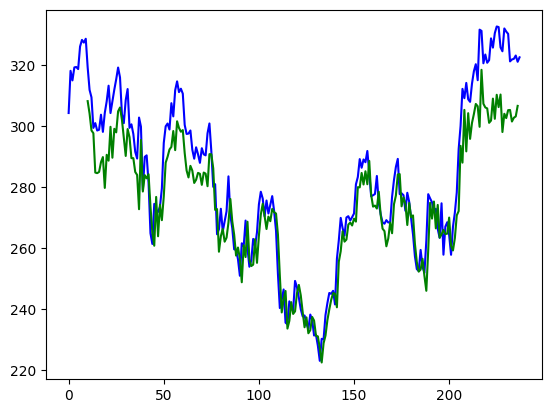

In [ ]:
testPredict = scaler.inverse_transform(test_pred)
testPredictPlot = np.empty_like(df_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[10:len(df_scaled)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_scaled)[:,4],'b')
plt.plot(testPredictPlot[:,4],'g')
plt.show()

In [ ]:
df2

,Stock,Low,Open,Volume,High,Close,Adjusted Close,Year,Month,Day
0,A,25.565092,25.636623,4156394.0,26.459227,26.094421,23.696428,2012,1,3
1,A,25.457796,25.858370,4651845.0,26.008583,25.886980,23.508047,2012,1,4
2,A,25.550787,25.665236,6842651.0,26.695278,26.466381,24.034206,2012,1,5
3,A,26.330473,26.530758,4711400.0,26.866953,26.752504,24.294035,2012,1,6
4,A,26.802574,26.909870,4429563.0,27.482117,27.453505,24.930614,2012,1,9
...,...,...,...,...,...,...,...,...,...,...
998716,ZTS,243.080002,244.389999,807000.0,246.720001,246.509995,244.714554,2021,12,27
998717,ZTS,243.639999,247.000000,1004400.0,247.839996,244.250000,242.471024,2021,12,28
998718,ZTS,243.639999,244.020004,939900.0,247.850006,247.029999,245.230759,2021,12,29
998719,ZTS,244.960007,247.050003,859100.0,249.270004,245.160004,243.374405,2021,12,30


#### Finding Sectors

In [ ]:
top50 = sorted(return_inv.items(), key=lambda x:x[1],reverse=True)[:50]


In [ ]:
top_df = pd.DataFrame.from_dict(top50)
top_df = top_df.rename(columns={0: "Stock", 1: "ROI_10"})
top_df['Industry'] = 'Industry'

In [ ]:
import requests # library to handle requests
from bs4 import BeautifulSoup

In [ ]:
data = requests.get("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies").text
soup = BeautifulSoup(data, 'html.parser')
SPtable=soup.find('table',{'class':"wikitable sortable"})


In [ ]:
df_sector=pd.read_html(str(SPtable))
# convert list to dataframe
df_sector=pd.DataFrame(df_sector[0])
cols = df_sector.columns.tolist()
cols = cols[0:1] + cols[2:3]
df_sector = df_sector[cols]
df_sector.head()

,Symbol,GICS Sector
0,MMM,Industrials
1,AOS,Industrials
2,ABT,Health Care
3,ABBV,Health Care
4,ACN,Information Technology


In [ ]:
np.unique(df_sector['GICS Sector'].values)

array(['Communication Services', 'Consumer Discretionary',
       'Consumer Staples', 'Energy', 'Financials', 'Health Care',
       'Industrials', 'Information Technology', 'Materials',
       'Real Estate', 'Utilities'], dtype=object)

In [ ]:
df_sector[df_sector['Symbol'] == 'AAPL']

,Symbol,GICS Sector
44,AAPL,Information Technology


In [ ]:
for i in range(len(top_df)):
    val = top_df['Stock'].iloc[i]
    if(val in np.unique(df_sector['Symbol'].values)):
      top_df['Industry'].loc[i] = df_sector[df_sector['Symbol']==val]['GICS Sector'].iloc[0]
    else:
      top_df['Industry'].loc[i] = 'Others'
        

<ipython-input-132-f5dc9fbb34ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_df['Industry'].loc[i] = df_sector[df_sector['Symbol']==val]['GICS Sector'].iloc[0]
<ipython-input-132-f5dc9fbb34ef>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_df['Industry'].loc[i] = 'Others'


In [ ]:
top_df

,Stock,ROI_10,Industry
0,NFLX,5737.597096,Communication Services
1,DXCM,5588.030043,Health Care
2,ALGN,2643.966479,Health Care
3,NOW,2538.658436,Information Technology
4,AMD,2525.912288,Information Technology
5,WST,2358.767974,Health Care
6,ODFL,1875.392076,Industrials
7,ABMD,1868.054868,Others
8,UEEC,1866.666623,Others
9,LRCX,1856.870815,Information Technology


####Mean Variance Optimization

<p> Daily returns calculated over a time period of 10 years for the top 50 stocks is used for optimization. Using Mean Returns data and variance-covariance matrix we find maxExpPortfolioReturn (maximal expected return) and minRiskExpPortfolioReturn (minimum expected risk). For a given portfolio, the R values are varied between these 2 values. The set of portfolios obtained is known as efficient set. The efficient sets are then plotted for each portfolio.

In [ ]:
df_opt = df[['Date','Stock','Daily Return']]

In [ ]:
top_df['Industry'].value_counts()

Information Technology    16
Health Care               11
Others                     5
Consumer Discretionary     5
Communication Services     4
Industrials                4
Financials                 3
Materials                  1
Real Estate                1
Name: Industry, dtype: int64

In [ ]:
arr_it = top_df[top_df['Industry']=='Information Technology']['Stock'].to_list()
mat = top_df[top_df['Industry']=='Materials']['Stock'].to_list()
re = top_df[top_df['Industry']=='Real Estate']['Stock'].to_list()

In [ ]:
p1 = arr_it[:8] + mat
p2 = arr_it[8:] + re

In [ ]:
p3 = top_df[top_df['Industry']=='Health Care']['Stock'].to_list()

In [ ]:
oth = top_df[top_df['Industry']=='Others']['Stock'].to_list()
cd =  top_df[top_df['Industry']=='Consumer Discretionary']['Stock'].to_list()
p4 = oth + cd

In [ ]:
cs = top_df[top_df['Industry']=='Communication Services']['Stock'].to_list()
ind = top_df[top_df['Industry']=='Industrials']['Stock'].to_list()
fin = top_df[top_df['Industry']=='Financials']['Stock'].to_list()
p5 = cs + ind + fin

Stocks in each portfolio

In [ ]:
print(p1)
print(p2)
print(p3)
print(p4)
print(p5)

['NOW', 'AMD', 'LRCX', 'CDNS', 'TYL', 'AMAT', 'MU', 'SNPS', 'SHW']
['MSFT', 'INTU', 'AAPL', 'ANET', 'CRM', 'IT', 'SWKS', 'ADSK', 'EXR']
['DXCM', 'ALGN', 'WST', 'IDXX', 'TMO', 'ILMN', 'HCA', 'REGN', 'EW', 'RMD', 'PKI']
['ABMD', 'UEEC', 'SIVB', 'TCYSF', 'STZ-B', 'AMZN', 'DPZ', 'LOW', 'HD', 'ORLY']
['NFLX', 'LYV', 'TTWO', 'CHTR', 'ODFL', 'CPRT', 'CTAS', 'URI', 'MSCI', 'MKTX', 'MCO']


In [ ]:
def stock_details(p,df_opt):
  df_p = pd.DataFrame()
  for i in range(len(p)):
    df_p = df_p.append(df_opt[df_opt['Stock']==p[i]], ignore_index=True)
  
  return df_p


In [ ]:
def func_calc(df):
  df_new = df.pivot_table('Daily Return',['Date'], 'Num')
  mean_ret=np.asarray(np.mean(df_new, axis = 0))
  cov_ret = np.cov(df_new, rowvar=False)
  print('Mean of Return:',mean_ret)
  print('Covariance of Return:',cov_ret)
  return df_new,mean_ret,cov_ret

In [ ]:
#function obtains maximal return portfolio using linear programming

def MaximizeReturns(MeanReturns, PortfolioSize):
    
    #dependencies
    from scipy.optimize import linprog
    import numpy as np
    
    c = (np.multiply(-1, MeanReturns))
    A = np.ones([PortfolioSize,1]).T
    b=[1]
    res = linprog(c, A_ub = A, b_ub = b, bounds = (0,1), method = 'highs') 
    
    return res

In [ ]:
def ME_Portfolio_Return(mean_ret,size):
  result1 = MaximizeReturns(mean_ret, size)
  maxReturnWeights = result1.x
  maxExpPortfolioReturn = np.matmul(mean_ret.T, maxReturnWeights)
  print("Maximal Expected Portfolio Return:   %7.4f" % maxExpPortfolioReturn )
  return maxExpPortfolioReturn

In [ ]:
#function obtains minimal risk portfolio 

#dependencies
import numpy as np
from scipy import optimize 

def MinimizeRisk(CovarReturns, PortfolioSize):
    
    def  f(x, CovarReturns):
        func = np.matmul(np.matmul(x, CovarReturns), x.T) 
        return func

    def constraintEq(x):
        A=np.ones(x.shape)
        b=1
        constraintVal = np.matmul(A,x.T)-b 
        return constraintVal
    
    xinit=np.repeat(0.1, PortfolioSize)
    cons = ({'type': 'eq', 'fun':constraintEq})
    lb = 0
    ub = 1
    bnds = tuple([(lb,ub) for x in xinit])

    opt = optimize.minimize (f, x0 = xinit, args = (CovarReturns),  bounds = bnds, \
                             constraints = cons, tol = 10**-3)
    
    return opt

In [ ]:
def Exp_Return_min_risk(cov_ret,mean_ret,size):
  result2 = MinimizeRisk(cov_ret, size)
  minRiskWeights = result2.x
  minRiskExpPortfolioReturn = np.matmul(mean_ret.T, minRiskWeights)
  print("Expected Return of Minimum Risk Portfolio:  %7.4f" % minRiskExpPortfolioReturn)
  return minRiskExpPortfolioReturn

In [ ]:
import numpy as np
from scipy import optimize 

def MinimizeRiskConstr(MeanReturns, CovarReturns, PortfolioSize, R):
    
    def  f(x,CovarReturns):
         
        func = np.matmul(np.matmul(x,CovarReturns ), x.T)
        return func

    def constraintEq(x):
        AEq=np.ones(x.shape)
        bEq=1
        EqconstraintVal = np.matmul(AEq,x.T)-bEq 
        return EqconstraintVal
    
    def constraintIneq(x, MeanReturns, R):
        AIneq = np.array(MeanReturns)
        bIneq = R
        IneqconstraintVal = np.matmul(AIneq,x.T) - bIneq
        return IneqconstraintVal
    

    xinit=np.repeat(0.1, PortfolioSize)
    cons = ({'type': 'eq', 'fun':constraintEq},
            {'type':'ineq', 'fun':constraintIneq, 'args':(MeanReturns,R) })
    lb = 0
    ub = 1
    bnds = tuple([(lb,ub) for x in xinit])

    opt = optimize.minimize (f, args = (CovarReturns), method ='trust-constr',  \
                        x0 = xinit,   bounds = bnds, constraints = cons, tol = 10**-3)
    
    return  opt
    



In [ ]:
def efficient_set(minRiskExpPortfolioReturn,maxExpPortfolioReturn,mean_ret,cov_ret,size,inc):
  increment = inc
  low = minRiskExpPortfolioReturn
  high = maxExpPortfolioReturn

  #initialize optimal weight set and risk-return point set
  xOptimal =[]
  minRiskPoint = []
  expPortfolioReturnPoint =[]

  #repeated execution of function MinimizeRiskConstr to determine the efficient set 
  while (low < high):
      
      result3 = MinimizeRiskConstr(mean_ret, cov_ret, size, low)
      xOptimal.append(result3.x)
      expPortfolioReturnPoint.append(low)
      low = low+increment
      
  #gather optimal weight set    
  xOptimalArray = np.array(xOptimal)

  #obtain annualized risk for the efficient set portfolios 
  #for trading days = 251
  minRiskPoint = np.diagonal(np.matmul((np.matmul(xOptimalArray,cov_ret)),\
                                      np.transpose(xOptimalArray)))
  riskPoint =   np.sqrt(minRiskPoint*251) 

  #obtain expected portfolio annualized return for the 
  #efficient set portfolios, for trading days = 251
  retPoint = 251*np.array(expPortfolioReturnPoint) 

  #display efficient set portfolio parameters
  print("Size of the  efficient set:", xOptimalArray.shape )
  print("Optimal weights of the efficient set portfolios: \n", xOptimalArray)
  print("Annualized Risk and Return of the efficient set portfolios: \n", \
                                                  np.c_[riskPoint, retPoint])
  return riskPoint,retPoint

In [ ]:
def plot_risk_return(riskPoint,retPoint,p_name):
  NoPoints = riskPoint.size

  colours = "blue"
  area = np.pi*3

  plt.title('Annualized Risk V/s Expected Portfolio Return: {}'.format(p_name))
  plt.xlabel('Annualized Risk(%)')
  plt.ylabel('Annualized Expected Portfolio Return(%)')
  plt.scatter(riskPoint, retPoint, s=area, c=colours, alpha =0.5)
  plt.show()

#####P1: Information Technology 1

In [ ]:
df_p1 = stock_details(p1,df_opt)

<ipython-input-70-df7d068a5731>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_p = df_p.append(df_opt[df_opt['Stock']==p[i]], ignore_index=True)


In [ ]:
df_p1['Num'] = pd.factorize(df_p1['Stock'])[0] + 1
df_p1

,Date,Stock,Daily Return,Num
0,2012-06-29,NOW,-67.805262,1
1,2012-07-02,NOW,0.691057,1
2,2012-07-03,NOW,2.180052,1
3,2012-07-05,NOW,2.568153,1
4,2012-07-06,NOW,-0.462246,1
...,...,...,...,...
22524,2021-12-27,SHW,2.118914,9
22525,2021-12-28,SHW,0.824774,9
22526,2021-12-29,SHW,0.849596,9
22527,2021-12-30,SHW,-0.284608,9


In [ ]:
dfp1_new,mean_ret_p1,cov_ret_p1 = func_calc(df_p1)

Mean of Return: [0.14049111 0.19516472 0.14412239 0.1304688  0.12924509 0.13170718
 0.14741689 0.11535442 0.10979344]
Covariance of Return: [[        nan         nan         nan         nan         nan         nan
          nan         nan         nan]
 [        nan 13.19619646  3.32418389  2.46626575  1.73126184  3.34256692
   4.16373614  2.24463552  1.43591546]
 [        nan  3.32418389  5.24624648  2.39411556  1.58877716  4.33564462
   3.98535636  2.11156213  1.54196176]
 [        nan  2.46626575  2.39411556  3.16204653  1.3851064   2.29898814
   2.2203931   2.14796714  1.13271918]
 [        nan  1.73126184  1.58877716  1.3851064   2.92635049  1.54510203
   1.63956135  1.27266502  0.87298848]
 [        nan  3.34256692  4.33564462  2.29898814  1.54510203  4.95987543
   3.94438979  2.03739795  1.44695079]
 [        nan  4.16373614  3.98535636  2.2203931   1.63956135  3.94438979
   8.04196907  2.01193238  1.41783437]
 [        nan  2.24463552  2.11156213  2.14796714  1.27266502  2.0373

In [ ]:
cov_ret_p1 = np.nan_to_num(cov_ret_p1)

In [ ]:
dfp1_new =dfp1_new.fillna(0)

In [ ]:
maxExpPortfolioReturn = ME_Portfolio_Return(mean_ret_p1,len(p1))

Maximal Expected Portfolio Return:    0.1952


In [ ]:
minRiskExpPortfolioReturn = Exp_Return_min_risk(cov_ret_p1,mean_ret_p1,len(p1))

Expected Return of Minimum Risk Portfolio:   0.1244


<p> Weights for each scenario and their corresponding annualized risk and annualized returns </p>

In [ ]:
riskPoint_p1,retPoint_p1 = efficient_set(minRiskExpPortfolioReturn,maxExpPortfolioReturn,mean_ret_p1,cov_ret_p1,len(p1),0.001)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Size of the  efficient set: (71, 9)
Optimal weights of the efficient set portfolios: 
 [[ 7.90343424e-01  1.63463094e-02  1.92584958e-02  2.43962316e-02
   2.78182262e-02  1.96978928e-02  1.77790105e-02  2.51206035e-02
   5.92398063e-02]
 [ 7.90923336e-01  1.64495593e-02  1.92469010e-02  2.47165435e-02
   2.79120943e-02  1.97157465e-02  1.78114012e-02  2.51370030e-02
   5.80874153e-02]
 [ 8.72680875e-01  1.05580091e-02  1.26587567e-02  1.72964963e-02
   2.10998269e-02  1.30103710e-02  1.17839782e-02  1.88528856e-02
   2.20588014e-02]
 [ 8.73638413e-01  1.04219961e-02  1.25881712e-02  1.70069494e-02
   2.10424183e-02  1.29518081e-02  1.16270005e-02  1.84560176e-02
   2.22672254e-02]
 [ 7.91593959e-01  1.65633179e-02  1.93163200e-02  2.42125760e-02
   2.76219212e-02  1.96686334e-02  1.78559140e-02  2.47851365e-02
   5.83822214e-02]
 [ 7.91921876e-01  1.66284402e-02  1.93442343e-02  2.40322987e-02
   2.74835496e-02  1.96474865e-02  1.78759571e-02  2.46261403e-02
   5.84400173e-02]
 [ 8.72

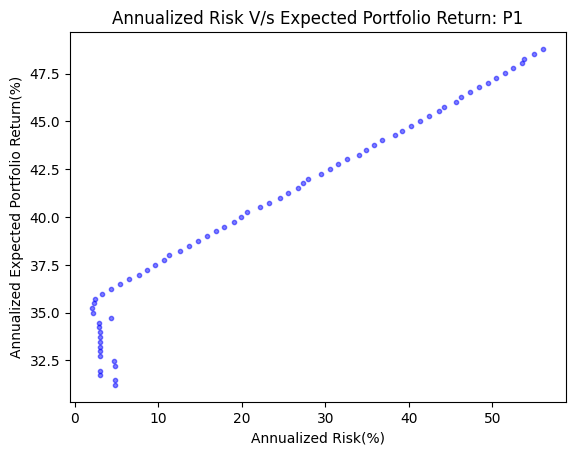

In [ ]:
plot_risk_return(riskPoint_p1,retPoint_p1,'P1')

#####P2: Information Technology 2

In [ ]:
df_p2 = stock_details(p2,df_opt)

<ipython-input-70-df7d068a5731>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_p = df_p.append(df_opt[df_opt['Stock']==p[i]], ignore_index=True)


In [ ]:
df_p2['Num'] = pd.factorize(df_p2['Stock'])[0] + 1
df_p2

,Date,Stock,Daily Return,Num
0,2012-01-03,MSFT,3.120190,1
1,2012-01-04,MSFT,2.353377,1
2,2012-01-05,MSFT,1.021900,1
3,2012-01-06,MSFT,1.553469,1
4,2012-01-09,MSFT,-1.316261,1
...,...,...,...,...
22039,2021-12-27,EXR,1.720183,9
22040,2021-12-28,EXR,0.360768,9
22041,2021-12-29,EXR,1.289596,9
22042,2021-12-30,EXR,0.066547,9


In [ ]:
dfp2_new,mean_ret_p2,cov_ret_p2 = func_calc(df_p2)

Mean of Return: [0.11474162 0.11347432 0.11567487 0.11081506 0.11359498 0.10458136
 0.12101784 0.11252144 0.09928194]
Covariance of Return: [[2.58512319 1.71056737 1.61220328        nan 1.81625962 1.14338723
  1.91677283 1.91797046 0.66900054]
 [1.71056737 2.7921289  1.51367647        nan 1.91770249 1.29363229
  1.94768315 1.95347011 0.73395746]
 [1.61220328 1.51367647 3.19472455        nan 1.57556019 1.03925235
  2.44402821 1.70143809 0.57589469]
 [       nan        nan        nan        nan        nan        nan
         nan        nan        nan]
 [1.81625962 1.91770249 1.57556019        nan 4.43301    1.40449034
  2.20813732 2.34560354 0.72783631]
 [1.14338723 1.29363229 1.03925235        nan 1.40449034 2.9164298
  1.55571277 1.58410668 0.73836574]
 [1.91677283 1.94768315 2.44402821        nan 2.20813732 1.55571277
  6.2313996  2.56996233 0.75237266]
 [1.91797046 1.95347011 1.70143809        nan 2.34560354 1.58410668
  2.56996233 4.78522802 0.6133312 ]
 [0.66900054 0.73395746 0.575

In [ ]:
cov_ret_p2 = np.nan_to_num(cov_ret_p2)
dfp2_new =dfp2_new.fillna(0)

In [ ]:
maxExpPortfolioReturn = ME_Portfolio_Return(mean_ret_p2,len(p2))

Maximal Expected Portfolio Return:    0.1210


In [ ]:
minRiskExpPortfolioReturn = Exp_Return_min_risk(cov_ret_p2,mean_ret_p2,len(p2))

Expected Return of Minimum Risk Portfolio:   0.1108


In [ ]:
riskPoint_p2,retPoint_p2 = efficient_set(minRiskExpPortfolioReturn,maxExpPortfolioReturn,mean_ret_p2,cov_ret_p2,len(p2),0.001)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Size of the  efficient set: (11, 9)
Optimal weights of the efficient set portfolios: 
 [[ 8.13965272e-03  7.73234705e-03  8.02703056e-03  9.35572621e-01
   6.65423442e-03  9.13250242e-03  5.69287867e-03  6.25876905e-03
   1.33178135e-02]
 [ 5.93195600e-03  5.53622411e-03  5.90398384e-03  9.56909746e-01
   4.73313189e-03  5.85469749e-03  4.37685248e-03  4.35874061e-03
   7.19885321e-03]
 [ 3.22109704e-02  4.69901451e-03  2.89946009e-02  8.56386263e-01
   5.20063931e-03 -6.76521612e-04  7.25061257e-02  2.01620174e-03
  -6.59073515e-04]
 [ 7.00817692e-02  8.38599323e-04  6.78837264e-02  6.20705635e-01
   5.24056352e-03  2.01663053e-05  2.33377180e-01  1.63021654e-03
   2.22143901e-04]
 [ 6.63733007e-02  5.62428947e-05  7.76204610e-02  5.23452984e-01
   3.79353534e-03  2.49721521e-05  3.28587176e-01  7.25879382e-05
   1.87399731e-05]
 [ 9.73455000e-02  8.57001634e-03  7.08474731e-02  3.98441411e-01
   8.02821844e-03  5.13300221e-05  4.14143927e-01  2.49677342e-03
   7.53511941e-05]
 [ 1.17

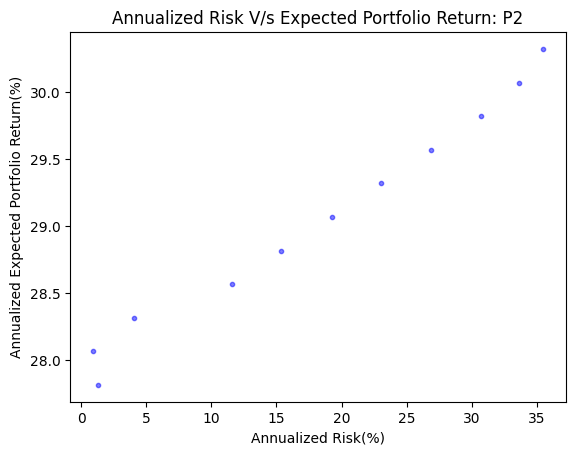

In [ ]:
plot_risk_return(riskPoint_p2,retPoint_p2,'P2')

#####P3: Health Care

In [ ]:
df_p3 = stock_details(p3,df_opt)
df_p3['Num'] = pd.factorize(df_p3['Stock'])[0] + 1
df_p3

<ipython-input-70-df7d068a5731>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_p = df_p.append(df_opt[df_opt['Stock']==p[i]], ignore_index=True)


,Date,Stock,Daily Return,Num
0,2012-01-03,DXCM,1.396339,1
1,2012-01-04,DXCM,-2.542371,1
2,2012-01-05,DXCM,-3.043475,1
3,2012-01-06,DXCM,-1.008970,1
4,2012-01-09,DXCM,0.113253,1
...,...,...,...,...
27682,2021-12-27,PKI,2.172674,11
27683,2021-12-28,PKI,-1.323364,11
27684,2021-12-29,PKI,1.085174,11
27685,2021-12-30,PKI,1.053272,11


In [ ]:
dfp3_new,mean_ret_p3,cov_ret_p3 = func_calc(df_p3)
cov_ret_p3 = np.nan_to_num(cov_ret_p3)
dfp3_new =dfp3_new.fillna(0)

Mean of Return: [0.20293514 0.16780146 0.1396433  0.12774304 0.11793188 0.13154949
 0.11870774 0.12248358 0.11570325 0.10913102 0.10423764]
Covariance of Return: [[8.41659306 2.54502432 1.45475848 1.7002892  1.33612225 2.20146165
  1.41620909 1.63257369 1.91580237 1.37537551 1.57022317]
 [2.54502432 7.19769682 1.41874741 1.9581859  1.56966029 2.24258052
  1.89745323 1.55974848 1.87578481 1.64915884 1.82948723]
 [1.45475848 1.41874741 2.44341411 1.1988295  1.15371221 1.30520797
  0.85740509 1.21466926 1.1980485  1.1408194  1.13692053]
 [1.7002892  1.9581859  1.1988295  2.96395549 1.24931384 1.50304685
  0.98497027 1.13796481 1.39917277 1.22637554 1.28823397]
 [1.33612225 1.56966029 1.15371221 1.24931384 2.14589028 1.62512873
  0.97774173 1.32900466 1.23838807 1.09915551 1.58780757]
 [2.20146165 2.24258052 1.30520797 1.50304685 1.62512873 6.35787432
  1.29727467 1.99401036 1.53167946 1.20068167 1.75754944]
 [1.41620909 1.89745323 0.85740509 0.98497027 0.97774173 1.29727467
  4.23366559 0

In [ ]:
maxExpPortfolioReturn = ME_Portfolio_Return(mean_ret_p3,len(p3))

Maximal Expected Portfolio Return:    0.2029


In [ ]:
minRiskExpPortfolioReturn = Exp_Return_min_risk(cov_ret_p3,mean_ret_p3,len(p3))

Expected Return of Minimum Risk Portfolio:   0.1211


In [ ]:
riskPoint_p3,retPoint_p3 = efficient_set(minRiskExpPortfolioReturn,maxExpPortfolioReturn,mean_ret_p3,cov_ret_p3,len(p3),0.001)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Size of the  efficient set: (82, 11)
Optimal weights of the efficient set portfolios: 
 [[ 2.03414733e-02  1.32570000e-02  2.00336172e-01  1.17805899e-01
   1.59369533e-01  2.08105797e-02  1.26684702e-01  4.76077032e-02
   4.32692369e-02  1.29495775e-01  1.21021926e-01]
 [ 2.06621209e-02  1.31771268e-02  2.00335760e-01  1.17977192e-01
   1.59747098e-01  2.07653404e-02  1.26741330e-01  4.75827252e-02
   4.30936259e-02  1.29369904e-01  1.20873957e-01]
 [ 2.03855120e-02  1.26288588e-02  2.00894075e-01  1.18294291e-01
   1.60448666e-01  2.02931289e-02  1.27056444e-01  4.74249098e-02
   4.28815924e-02  1.29567373e-01  1.21097372e-01]
 [ 3.08522180e-02  1.56566575e-02  2.14777149e-01  1.08283142e-01
   1.67296592e-01  2.19042611e-02  1.23772897e-01  4.62810178e-02
   3.62925902e-02  1.28433880e-01  1.06449596e-01]
 [ 3.53728808e-02  1.19659206e-02  2.30584207e-01  1.07085225e-01
   1.73023210e-01  1.70227285e-02  1.23977183e-01  4.74971749e-02
   3.34521297e-02  1.25450041e-01  9.45693002e-0

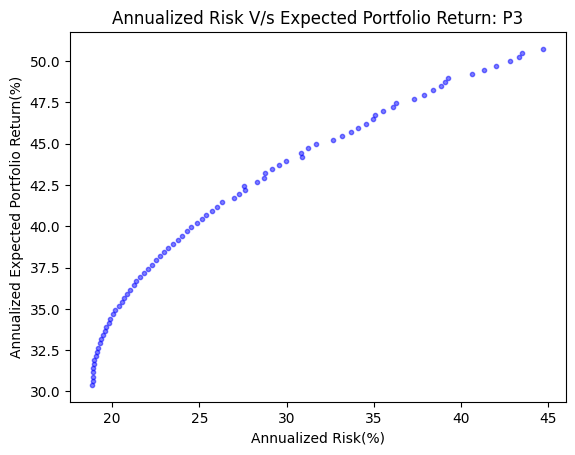

In [ ]:
plot_risk_return(riskPoint_p3,retPoint_p3,'P3')

#####P4: Others + Consumer Discretionary

In [ ]:
df_p4 = stock_details(p4,df_opt)
df_p4['Num'] = pd.factorize(df_p4['Stock'])[0] + 1
df_p4

<ipython-input-70-df7d068a5731>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_p = df_p.append(df_opt[df_opt['Stock']==p[i]], ignore_index=True)


,Date,Stock,Daily Return,Num
0,2012-01-03,ABMD,-1.191117,1
1,2012-01-04,ABMD,-0.767120,1
2,2012-01-05,ABMD,0.883489,1
3,2012-01-06,ABMD,-0.711555,1
4,2012-01-09,ABMD,0.385886,1
...,...,...,...,...
24876,2021-12-27,ORLY,1.916343,10
24877,2021-12-28,ORLY,0.639766,10
24878,2021-12-29,ORLY,1.617234,10
24879,2021-12-30,ORLY,-0.899539,10


In [ ]:
dfp4_new,mean_ret_p4,cov_ret_p4 = func_calc(df_p4)
cov_ret_p4 = np.nan_to_num(cov_ret_p4)
dfp4_new =dfp4_new.fillna(0)

Mean of Return: [0.15750251 0.43571089 0.13330831 0.10314205 0.11842136 0.13557185
 0.12735756 0.10763707 0.10108666 0.10044127]
Covariance of Return: [[ 7.72711344e+00  9.04118420e-01  1.57771014e+00             nan
   7.08558428e-01  1.40053093e+00  9.31250176e-01  1.03699492e+00
   9.36755531e-01  7.96579890e-01]
 [ 9.04118420e-01  7.02684797e+01  2.71338896e-01             nan
   1.09927564e+00  7.10977217e-01  9.78643120e-02  3.30025815e-01
   1.66611031e-01 -1.54211422e-02]
 [ 1.57771014e+00  2.71338896e-01  5.56266780e+00             nan
   7.22738206e-01  1.43957775e+00  9.35137385e-01  1.79552113e+00
   1.53040567e+00  1.35864813e+00]
 [            nan             nan             nan             nan
              nan             nan             nan             nan
              nan             nan]
 [ 7.08558428e-01  1.09927564e+00  7.22738206e-01             nan
   3.96585859e+00  5.56513020e-01  2.67624826e-01  7.57909221e-01
   6.11474761e-01  5.74195596e-01]
 [ 1.40053093e

In [ ]:
maxExpPortfolioReturn = ME_Portfolio_Return(mean_ret_p4,len(p4))

Maximal Expected Portfolio Return:    0.4357


In [ ]:
minRiskExpPortfolioReturn = Exp_Return_min_risk(cov_ret_p4,mean_ret_p4,len(p4))

Expected Return of Minimum Risk Portfolio:   0.1031


In [ ]:
riskPoint_p4,retPoint_p4 = efficient_set(minRiskExpPortfolioReturn,maxExpPortfolioReturn,mean_ret_p4,cov_ret_p4,len(p4),0.005)

Size of the  efficient set: (18, 10)
Optimal weights of the efficient set portfolios: 
 [[0.0472916  0.03779537 0.0294148  0.64945199 0.06006611 0.04235366
  0.04162226 0.02472154 0.03954528 0.0277374 ]
 [0.02770266 0.05174749 0.02852528 0.62935507 0.05808964 0.05070373
  0.06245569 0.0282751  0.02654293 0.03660241]
 [0.0622475  0.06020231 0.03624046 0.66864556 0.01701624 0.05243299
  0.06879273 0.01131552 0.01192777 0.01117892]
 [0.07052798 0.07247565 0.03251505 0.64201786 0.02359155 0.04695028
  0.08984361 0.00870982 0.00701127 0.00635693]
 [0.08942871 0.08273286 0.03139476 0.60271676 0.02744599 0.08332043
  0.06237005 0.00769771 0.00618531 0.00670742]
 [0.0956725  0.09403721 0.04150719 0.5545435  0.02403621 0.08547346
  0.08603129 0.0073309  0.00551942 0.00584832]
 [0.10451914 0.10480945 0.04276123 0.50286564 0.02495065 0.09769357
  0.10596848 0.0056404  0.00512969 0.00566175]
 [0.0991507  0.11287093 0.09871247 0.09834662 0.09850621 0.0987482
  0.09862422 0.09838777 0.09832905 0.098

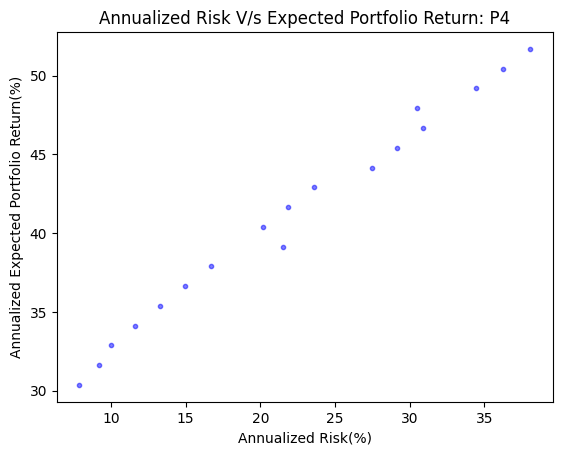

In [ ]:
plot_risk_return(riskPoint_p4,retPoint_p4,'P4')

#####P5: Communication Services + Industrials + Financials

In [ ]:
df_p5 = stock_details(p5,df_opt)
df_p5['Num'] = pd.factorize(df_p5['Stock'])[0] + 1
df_p5

<ipython-input-70-df7d068a5731>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_p = df_p.append(df_opt[df_opt['Stock']==p[i]], ignore_index=True)


,Date,Stock,Daily Return,Num
0,2012-01-03,NFLX,4.257470,1
1,2012-01-04,NFLX,11.364897,1
2,2012-01-05,NFLX,-1.429459,1
3,2012-01-06,NFLX,8.814628,1
4,2012-01-09,NFLX,13.779115,1
...,...,...,...,...
27682,2021-12-27,MCO,0.556309,11
27683,2021-12-28,MCO,-0.012514,11
27684,2021-12-29,MCO,-0.340498,11
27685,2021-12-30,MCO,-1.758529,11


In [ ]:
dfp5_new,mean_ret_p5,cov_ret_p5 = func_calc(df_p5)
cov_ret_p5 = np.nan_to_num(cov_ret_p5)
dfp5_new =dfp5_new.fillna(0)

Mean of Return: [0.20698149 0.13218391 0.12607743 0.11168122 0.13337176 0.11347314
 0.11325341 0.13448505 0.1326677  0.12227279 0.1117492 ]
Covariance of Return: [[8.95799202 1.21545534 1.96118264 1.08483234 1.19882896 1.08157091
  1.01725411 1.98823537 1.49229834 0.97586828 1.37625943]
 [1.21545534 5.26128658 1.09847096 1.05226765 1.33626931 1.35695078
  1.6975347  2.80940951 1.31166164 0.79007838 1.5639534 ]
 [1.96118264 1.09847096 4.76738845 0.92765103 1.15319986 1.0262671
  0.94886003 1.5352598  1.32595572 1.02144476 1.28910293]
 [1.08483234 1.05226765 0.92765103 2.96710714 0.7768239  0.83551005
  0.86355059 1.43826314 1.07566683 0.83116734 1.16922391]
 [1.19882896 1.33626931 1.15319986 0.7768239  2.90310303 1.23367498
  1.22881745 2.39371581 1.30193929 0.8702953  1.4423665 ]
 [1.08157091 1.35695078 1.0262671  0.83551005 1.23367498 2.51166874
  1.29137888 1.93402233 1.3043881  0.9390519  1.36553934]
 [1.01725411 1.6975347  0.94886003 0.86355059 1.22881745 1.29137888
  2.41892335 2.

In [ ]:
maxExpPortfolioReturn = ME_Portfolio_Return(mean_ret_p5,len(p5))

Maximal Expected Portfolio Return:    0.2070


In [ ]:
minRiskExpPortfolioReturn = Exp_Return_min_risk(cov_ret_p5,mean_ret_p5,len(p5))

Expected Return of Minimum Risk Portfolio:   0.1210


In [ ]:
riskPoint_p5,retPoint_p5 = efficient_set(minRiskExpPortfolioReturn,maxExpPortfolioReturn,mean_ret_p5,cov_ret_p5,len(p5),0.001)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Size of the  efficient set: (87, 11)
Optimal weights of the efficient set portfolios: 
 [[ 4.18485217e-02  4.13306903e-02  7.07735014e-02  2.04605794e-01
   1.43641965e-01  1.35816038e-01  1.32598441e-01  1.14415610e-02
   4.87655320e-02  1.33605799e-01  3.55721577e-02]
 [ 4.31239928e-02  4.17225259e-02  7.13592023e-02  2.04277362e-01
   1.43756872e-01  1.35240250e-01  1.31705787e-01  1.11871684e-02
   4.92342900e-02  1.33276390e-01  3.54479985e-02]
 [ 4.32994226e-02  4.16430281e-02  7.15334099e-02  2.04678072e-01
   1.44188124e-01  1.35533132e-01  1.31898010e-01  1.05417339e-02
   4.91729456e-02  1.33396719e-01  3.50717580e-02]
 [ 5.18359193e-02  3.67646589e-02  7.13652984e-02  1.96163318e-01
   1.55696864e-01  1.46044770e-01  1.39482784e-01  4.60111947e-03
   4.20782047e-02  1.41154577e-01  1.48124868e-02]
 [ 5.93102337e-02  3.85301915e-02  7.01578966e-02  1.92421710e-01
   1.59387137e-01  1.41584568e-01  1.34544837e-01  4.64568042e-03
   4.39505099e-02  1.41440597e-01  1.40266393e-0

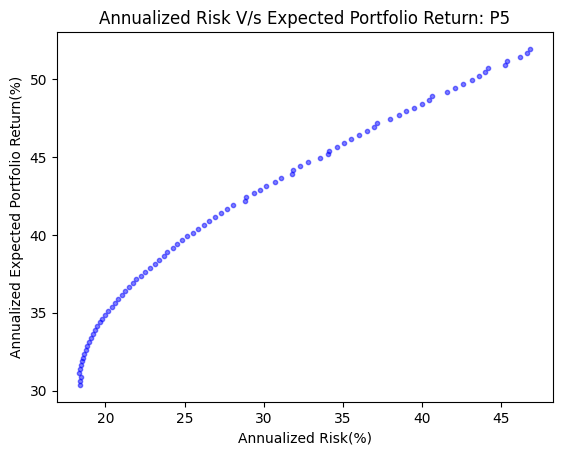

In [ ]:
plot_risk_return(riskPoint_p5,retPoint_p5,'P5')